#          Yelp review scraping, Sentiment Analysis and NB Prediction
This Project first scrapy yelp review data, then we do Sentiment Analysis, prediction using Naive Bayes
Frank Lanfa Wang, 5/2016, FrankWanglf@gmail.com

### This section is app for Yelp review download 

In [1]:
## Project 3 Web scraping
%matplotlib inline
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import re

queries = 0
tot_reviews=0
tot_authors=0
tot_ratings=0
authors_rev=[]
ratings_rev=[]
Features=[]

f=open("summary_auth_rating_tmp.txt", encoding='utf-8', mode="w")
f1=open("reviews_tmp.txt", encoding='utf-8', mode="w")
f2=open("author_tmp.txt", encoding='utf-8', mode="w")
f3=open("rating_tmp.txt", "w")

while queries <2020:
    stringQ = str(queries)
    page =urlopen('http://www.yelp.com/biz/abc-kitchen-new-york?start=' + stringQ)
    soup = BeautifulSoup(page,"lxml")
    reviews = soup.findAll('p', attrs={'itemprop':'description'})
    authors = soup.findAll('meta',attrs={'itemprop':'author'})
    ratings=  soup.findAll('meta',attrs={'itemprop':'ratingValue'})
    flag = True
    indexOf = 1
    for it,review in enumerate(reviews):
        dirtyEntry = str(review)
        tot_reviews+=1
        while dirtyEntry.index('<') != -1:
            indexOf = dirtyEntry.index('<')
            endOf = dirtyEntry.index('>')
            if flag:
                dirtyEntry = dirtyEntry[endOf+1:]
                flag = False
            else:
                if(endOf+1 == len(dirtyEntry)):
                    cleanEntry = dirtyEntry[0:indexOf]
                    break
                else:
                    dirtyEntry = dirtyEntry[0:indexOf]+dirtyEntry[endOf+1:]
        f1.write(cleanEntry)
        f1.write("\n")
        Features.append(cleanEntry)
    author_pattern = re.compile(r'\"[a-zA-Z. ]\" itemprop=')
    for author in authors:
        tot_authors+=1
        dirty = str(author)
        closing = dirty.index('=\"')
        dirty = dirty[closing+2:]
        opening = dirty.index('" ')
        cleanEntry = dirty[0:opening]
        authors_rev.append(cleanEntry)
        f2.write(cleanEntry)
        f2.write("\n")

    rating_pattern = re.compile(r'\d.\d\" itemprop=')
    id_rating=0
    for rate in ratings:
        id_rating+=1
        if(id_rating>1):
            dirty = str(rate)
            tot_ratings+=1
            rating=re.findall(rating_pattern,dirty)
            rating=float(rating[0][0:3])
            f3.write("Custmer {} rating ={}".format(id_rating,rating))
            id_rating=id_rating+1
            f3.write("\n")
            ratings_rev.append(rating)
    queries = queries + 20

f1.close()
f2.close()
f3.close()

f.write('Total reviews={}'.format(tot_reviews))
f.write("\n")
f.write('Total authors={}'.format(tot_authors))
f.write("\n")
f.write('Total ratings={}'.format(tot_ratings))
f.write("\n")

for i in range(0,tot_ratings):
    au=authors_rev[i]
    rat=ratings_rev[i]
    f.write('{}  {}'.format(au,rat))
    f.write("\n")
f.close()

print('Total reviews={}'.format(tot_reviews))
print('Total authors={}'.format(tot_authors))
print('Total ratings={}'.format(tot_ratings))

Total reviews=2020
Total authors=2020
Total ratings=2020


In [2]:
from IPython.display import HTML
HTML('<iframe src=http://www.yelp.com/biz/abc-kitchen-new-york?start=20/ width=800 height=600></iframe>')

,Name,Rating
0,Joanne K.,5
1,Kelly P.,4
2,Jane R.,3
3,Qian H.,4
4,Serena A.,5
5,Eugenia L.,5
6,Sheila R.,5
7,Jason H.,3
8,Julia K.,4
9,Jenn P.,4


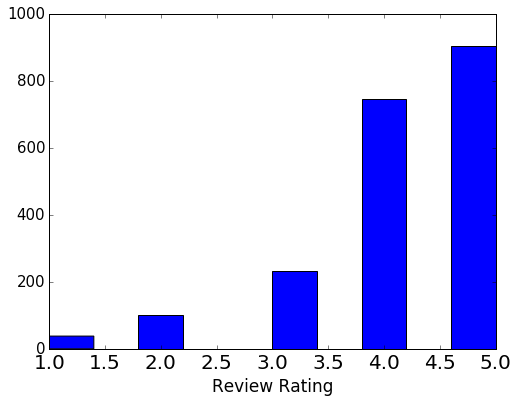

In [3]:
from nltk.probability import FreqDist, ConditionalFreqDist
import matplotlib.pyplot as plt
num_tab=9000
if len(authors_rev)<num_tab:
    num_tab=len(authors_rev)

reviewers={'Name':authors_rev[:num_tab],'Rating':ratings_rev[:num_tab]}
reviewers=pd.DataFrame(reviewers)
plt.figure(figsize=(8,6))
plt.hist(reviewers.Rating)
plt.xlabel('Review Rating',fontsize=17)
plt.xticks(size=20)
plt.yticks(size=15)
reviewers.head(10)

# Sentiment Analysis

In [5]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
sa_score=[]
for ir in range(len(reviewers.Rating)):
        testimonial = TextBlob(Features[ir])
        sc=testimonial.sentiment.polarity
        #sc=sc*2.5+2.5
        sc=sc*2+3
        sa_score.append(sc)
reviewers['Sa_score']=sa_score

In [6]:
accuacy_sa=[1 for x in sa_score if x>3]
accuacy_sa=sum(accuacy_sa)/len(sa_score)
print('The accuracy of SA prediction is : {}'.format(accuacy_sa))

The accuracy of SA prediction is : 0.9589108910891089


,Sa_score,Rating
Rating,,
1,3.148169,1
2,3.219520,2
3,3.441397,3
4,3.625006,4
5,3.720829,5


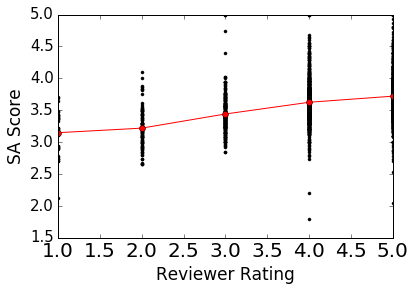

In [7]:
plt.plot(reviewers.Rating,reviewers.Sa_score,'.k')
group=reviewers.groupby('Rating')
rat_av=group.agg('mean')
rat_av['Rating']=[1,2,3,4,5]
#plt.figure(figsize=(8,6))
plt.plot(rat_av.index,rat_av.Sa_score,'-or')

plt.xlabel('Reviewer Rating',fontsize=17)
plt.ylabel('SA Score',fontsize=17)
plt.xticks(size=20)
plt.yticks(size=15)

rat_av

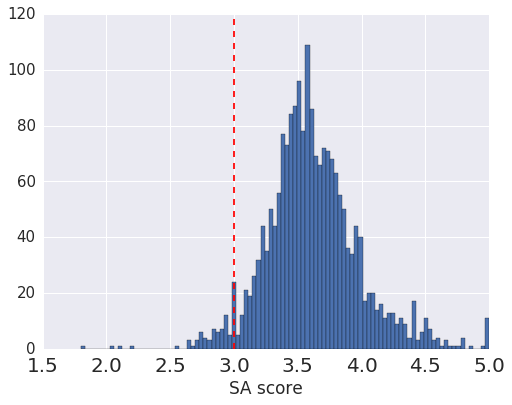

In [14]:
plt.figure(figsize=(8,6))
plt.hist(sa_score,bins=100)
plt.xlabel('SA score',fontsize=17)
plt.xticks(size=20)
plt.yticks(size=15)
plt.plot([3,3],[0,120],'--r')

mean score of SA=3.6177575251182743
real score=4.177227722772277


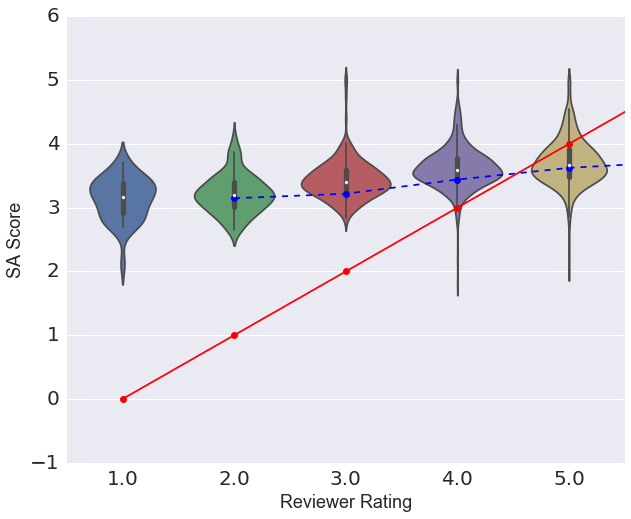

In [9]:
import numpy as np
from scipy import stats
import seaborn as sns
score_real=reviewers.Rating.mean()
factor=score_real/np.mean(sa_score)
factor=1
plt.figure(figsize=(10,8))
sns.violinplot(x=reviewers.Rating, y=reviewers.Sa_score*factor, data=reviewers)
x=range(6)
#sns.kdeplot(rat_av.Fa_score,shade=True)
plt.plot(x,x,'-or')
plt.plot(rat_av.index,rat_av.Sa_score*factor,'--ob')
plt.xlabel('Reviewer Rating',fontsize=18)
plt.ylabel('SA Score',fontsize=18)
plt.xticks(size=20)
plt.yticks(size=20)
print('mean score of SA={}'.format(np.mean(sa_score)))
print('real score={}'.format(score_real))

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4]),
 <a list of 8 Text yticklabel objects>)

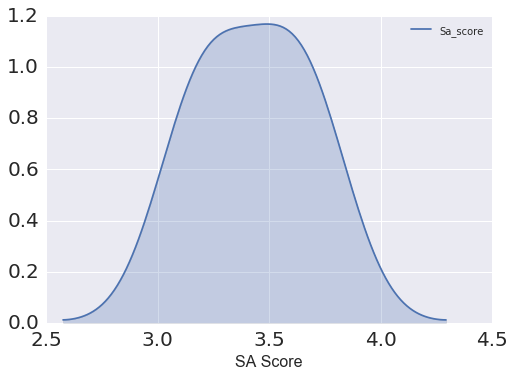

In [43]:
sns.kdeplot(rat_av.Sa_score,shade=True)
plt.xlabel('SA Score',fontsize=16)
plt.xticks(size=20)
plt.yticks(size=20)

# Prediction using Navie Baye

In [10]:
def features_extra(Features,reviewers):
    yelpFeatures=[]
    for ir,feature in enumerate(Features):
        Words = re.findall(r"[\w']+|[.,!?;]", feature.rstrip())
        wordb=dict([(word.lower(), True) for word in Words])
        if (reviewers.Rating[ir]>=3):
            Words = [wordb, 'pos']
        else:
            Words = [wordb, 'neg']            
        yelpFeatures.append(Words)
    return yelpFeatures
## test for greeting is treated as a negative word
def features_extra_mod(Features,reviewers):
    yelpFeatures=[]
    postive_words=['greeting','ultimately','politely']
    for ir,feature in enumerate(Features):
        Words = re.findall(r"[\w']+|[.,!?;]", feature.rstrip())
        wordb=dict([(word.lower(), True) for word in Words])
        pol='neg'
        if (reviewers.Rating[ir]>=3):
            pol='pos'
        for wor  in wordb.keys():
            if wor in postive_words:
                print('positiveword corrected={} in reviwer {}'.format(wor,ir))                
                pol='pos'
        Words = [wordb, pol]
        yelpFeatures.append(Words)
    return yelpFeatures

In [11]:
Features=features_extra(Features,reviewers)
#yelpFeatures=Features

### Read data

In [58]:
from ipykernel import kernelapp as app
#rating_data=pd.read_csv('summary_auth_rating_ABC.txt',sep='  ',header=None)
rating_data=pd.read_csv('summary_auth_rating_resturant.txt',sep='  ',header=None)
rating_data.columns=['Author','Rating']
rating_data.head()
print('total ratings={}'.format(len(rating_data)))

total ratings=6000


C:\Users\wanglf\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


In [63]:
import codecs
import random
with codecs.open('reviews_resturant.txt', 'r','utf-8') as revSentences:
    yelpFeatures=[]
    for ir,feature in enumerate(revSentences):
        Words = re.findall(r"[\w']+|[.,!?;]", feature.rstrip())
        wordb=dict([(word.lower(), True) for word in Words])
        pol='neg'
#        rat=as.numer(rating_data.Rating[ir])
        if (rating_data.Rating[ir]>=3):
            pol='pos'
        Words = [wordb, pol] 
        yelpFeatures.append(Words)
print('totoal reviews={}'.format(ir+1))
random.shuffle(yelpFeatures)

totoal reviews=6000


In [68]:
def feature_select(words):
    return dict([(word, True) for word in words])

## Prediction of yelp feature

In [71]:
import re, math, collections, itertools, os
import nltk, nltk.classify.util, nltk.metrics
from nltk.classify import NaiveBayesClassifier
from nltk.metrics import BigramAssocMeasures
from nltk.probability import FreqDist, ConditionalFreqDist
import random

random.shuffle(yelpFeatures)
Cutoff = int(math.floor(len(yelpFeatures)*3/4))
trainFeatures = yelpFeatures[:Cutoff]
testFeatures = yelpFeatures[Cutoff:]

classifier = NaiveBayesClassifier.train(trainFeatures)
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)	
for i, (features, label) in enumerate(testFeatures):
    referenceSets[label].add(i)
    predicted = classifier.classify(features)
    testSets[predicted].add(i)
print ('train on %d instances, test on %d instances' % (len(trainFeatures), len(testFeatures)))
print ('accuracy:', nltk.classify.util.accuracy(classifier, testFeatures))
classifier.show_most_informative_features(20)

train on 4500 instances, test on 1500 instances
accuracy: 0.72
Most Informative Features
               apologies = True              neg : pos    =     32.7 : 1.0
                horribly = True              neg : pos    =     27.7 : 1.0
                  ripped = True              neg : pos    =     27.7 : 1.0
                mistakes = True              neg : pos    =     27.7 : 1.0
                 message = True              neg : pos    =     27.7 : 1.0
              compensate = True              neg : pos    =     22.6 : 1.0
              dismissive = True              neg : pos    =     22.6 : 1.0
                 generic = True              neg : pos    =     22.6 : 1.0
             apologizing = True              neg : pos    =     22.6 : 1.0
                    trap = True              neg : pos    =     22.6 : 1.0
                remotely = True              neg : pos    =     17.6 : 1.0
                bullshit = True              neg : pos    =     17.6 : 1.0
           

### NaiveBaye Classifer with Movie Reivews data

In [72]:
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
 
def word_feats(words):
    return dict([(word, True) for word in words])
 
negids = movie_reviews.fileids('neg')
posids = movie_reviews.fileids('pos')
 
negfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'neg') for f in negids]
posfeats = [(word_feats(movie_reviews.words(fileids=[f])), 'pos') for f in posids]
 
negcutoff = int(math.floor(len(negfeats)*3/4))
poscutoff = int(math.floor(len(posfeats)*3/4))
 
trainfeats = negfeats[:negcutoff] + posfeats[:poscutoff]
testfeats = negfeats[negcutoff:] + posfeats[poscutoff:]
print ('train on %d instances, test on %d instances' % (len(trainfeats), len(testfeats)))
 
classifier = NaiveBayesClassifier.train(trainfeats)
print ('accuracy:', nltk.classify.util.accuracy(classifier, testfeats))
classifier.show_most_informative_features()

train on 1500 instances, test on 500 instances
accuracy: 0.728
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0


### The following run Yelp prediction with Movie review traning data!
The accuaracy is pretty high 0.811

In [86]:
Cutoff = int(math.floor(len(Features)*3/4))
trainFeatures1 = Features[:Cutoff]
testFeatures1 = Features[Cutoff:]

referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)	
for i, (features, label) in enumerate(testFeatures):
    referenceSets[label].add(i)
    predicted = classifier.classify(features)
    testSets[predicted].add(i)
print ('train on %d instances, test on %d instances' % (len(trainFeatures1), len(testFeatures1)))
print ('accuracy:', nltk.classify.util.accuracy(classifier, testFeatures1))
classifier.show_most_informative_features(20)

train on 1515 instances, test on 505 instances
accuracy: 0.8118811881188119
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0
               affecting = True              pos : neg    =      9.7 : 1.0
                  symbol = True              pos : neg    =      9.7 : 1.

### Movie reviewer Training data +Yelp test data  (1500test)

In [136]:
referenceSets = collections.defaultdict(set)
testSets = collections.defaultdict(set)	
for i, (features, label) in enumerate(testFeatures):
    referenceSets[label].add(i)
    predicted = classifier.classify(features)
    testSets[predicted].add(i)
print ('train on %d instances, test on %d instances' % (len(trainFeatures), len(testFeatures)))
print ('accuracy:', nltk.classify.util.accuracy(classifier, testFeatures))
classifier.show_most_informative_features(20)

train on 4500 instances, test on 1500 instances
accuracy: 0.78
Most Informative Features
             magnificent = True              pos : neg    =     15.0 : 1.0
             outstanding = True              pos : neg    =     13.6 : 1.0
               insulting = True              neg : pos    =     13.0 : 1.0
              vulnerable = True              pos : neg    =     12.3 : 1.0
               ludicrous = True              neg : pos    =     11.8 : 1.0
             uninvolving = True              neg : pos    =     11.7 : 1.0
                  avoids = True              pos : neg    =     11.7 : 1.0
              astounding = True              pos : neg    =     10.3 : 1.0
             fascination = True              pos : neg    =     10.3 : 1.0
                 idiotic = True              neg : pos    =      9.8 : 1.0
               affecting = True              pos : neg    =      9.7 : 1.0
                  symbol = True              pos : neg    =      9.7 : 1.0
           

# Summary

#### The Yelp review text is downloaded first. Then it is used for SA (Sentiment Analysis) and supervised machine learning using Naive Bayes.  In the supervised learning, the ratings are scaled to two categories: positive and negative. The prediction accuracy is about 72% with 6000 features. This is preliminary study. Further improvements with bigram and other technics will be done
